<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RandomForest_LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# 1. Download dataset
path = kagglehub.dataset_download("abhishekmishra08/loan-approval-datasets")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-datasets


In [4]:
# 2. Load dataset (adjust filename if needed)
df = pd.read_csv(f"{path}/loan_data.csv")

In [5]:
# 3. Basic exploration
print(df.head())
print(df.info())
print(df.isnull().sum())

                                                Text  Income  Credit_Score  \
0  I need a loan to pay for an international vaca...   26556           581   
1  I want to make home improvements like installi...  197392           389   
2  I need a loan for home renovation, including a...   44561           523   
3  I need funds to buy new furniture and applianc...  190363           729   
4           I need a loan to start a small business.   61853           732   

   Loan_Amount  DTI_Ratio Employment_Status  Approval  
0         8314      79.26          employed  Rejected  
1       111604      22.14          employed  Rejected  
2        34118      45.44          employed  Rejected  
3       118757      10.22        unemployed  Rejected  
4        19210      44.13          employed  Approved  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -------------- 

In [7]:
# 4. Preprocessing
# Separate features and target
X = df.drop('Approval', axis=1)
y = df['Approval']

# Handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns

# Simple encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values (simple strategy: fill with median for numeric, mode for categorical)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode target variable (if needed)
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [8]:
# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 6. Build and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# 7. Predictions
y_pred = model.predict(X_test)

In [11]:
# 8. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 749    4]
 [   9 4038]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      1.00      0.99      4800
weighted avg       1.00      1.00      1.00      4800


Accuracy Score: 0.9972916666666667


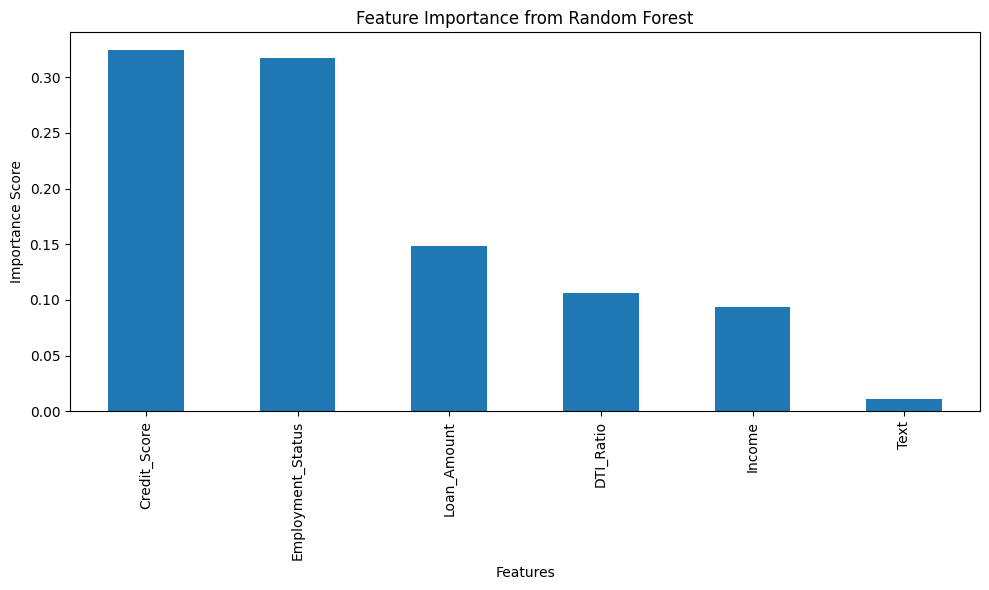

In [12]:
import matplotlib.pyplot as plt

# 9. Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create a sorted dataframe for better plotting
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Display feature importances
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()